# Let's get coding
there is a t_tests notebook where you can copy the data links from. <br>
They are actually from lab08, but i thought it made more sense to just start from scratch today. This means that we are actually 'making' lab08 today but I just thought all the text there would be too confusing. <br>
So make a new notebook and make sure to save it some place where you can access it again. Then we'll get started.

In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install pingouin
# %pip install statistics
# %pip install matplotlib

In [133]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg 
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_rel
from scipy import stats

## getting the first dataset 
Remember, what we want to do is:

- create group 1 and group 2 (i.e., preparing the data)
- do the test so it corresponds to the RQ
- report the result
- plot it


In [208]:
# Moon and aggression
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Moon%20and%20Aggression.csv')
df.head()
#df.shape

# dementia patients 
# moon column is nr of disruptive behaviors during full moon days
# other column is nr of disruptive beahviors all other days

,Moon,Other
0,3.33,0.27
1,3.67,0.59
2,2.67,0.32
3,3.33,0.19
4,3.33,1.26


so what we want to investigate is whether the amount of aggressive behavior differs moon days and non-moon days 

### what is group 1 and group 2?
Pretty easy in with this data, bc there are only two column and they each correspond to a group.
DRAW THIS ON THE BOARD

In [5]:
group1 = df['Moon']
group2 = df['Other']

### which test should we do?
There are different kinds of tests! Woo! And different ways to write them based on which package you use! Woo! <br>
The three main types are:

- **paired-samples t-test** (i.e., participants are in both groups)
    - usually a 'before and after something' study (e.g., balance after drinking)
- **independent-samples t-test** (i.e., different participants in each group)
    - studies where people are only exposed to one of the conditions 
- **one-sample t-test** (i.e., comparing a group against a set mean)
    - for when we have some mean we find meaningful to compare to some groups (e.g., IQ of you guys compared to the average IQ for danes)
    
Ethan will go over this in more detail tomorrow, I will just tell you which one to use and show you how to write it in both pingouin and scipy

In [16]:
# paired sample t-test in pingouin
test1 = pg.ttest(group1, group2, paired = True)
# could just have been
test1 = pg.ttest(df['Moon'], df['Other'], paired = True)
test1
#test1["dof"]

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.451789,14,two-sided,0.000015,"[1.62, 3.24]",2.200516,1521.058,1.0


In [38]:
# paired sample t-test in scipy
test2 = ttest_rel(a = group1, b = group2, alternative = 'two-sided')

test2
#test2[1]

Ttest_relResult(statistic=6.451788554357532, pvalue=1.5181521009727053e-05)

What's the difference between these two? 
Pingouin outputs more info, which will be useful in a sec. With scipy we need to do more stuff afterwards ourself - but once you want to do more advanced stats then you can't use pingouin, so scipy is good to know!

### Writing it up
When we write our reports we want to report our results in APA format, which looks something like this: <br>
> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

or 

> Grades were significantly higher for psychology students (mean = 72.3) than the average student (mean = 67.5) (t(19) = 2.25, p < 0.05) 

For this specific dataset, we then want to write something like: 
> Disruptive behaviours were more frequent during the full moon periods (**mean =** ) than during other periods (**mean =** ) (**t( ) = , p =** )

Where bolded stuff is things we need to fill out. So, let's do this with an f-string! (Because then you can copy whatever it prints here directly into your reports) <br>
(But you can also just read the values from test1 and write that in manually, we still need to do the mean thing though)

In [47]:
m1 = np.mean(group1).round(3)
m2 = np.mean(group2).round(3)

dof = 14 # (or df.shape[0] - 1)
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Disruptive behaviors were more frequent during the full moon periods (mean = {m1}) than during other periods (mean = {m2}) (t({dof}) = {t}, p = {p})")

Disruptive behaviors were more frequent during the full moon periods (mean = 3.022) than during other periods (mean = 0.589) (t(14) = 6.452, p = 0.0)


### let's plot it!
We can do the one I quickly drew on the board or we can do something else - any suggestions?


In [209]:
# but first! the data is in the wrong format for this kind of plotting!
# so we need to melt it (spooky)

# this is actually fine
moon_df = pd.melt(df) 
moon_df.head() # just not the most meaningful

# so let's add some stuff
moon_df = pd.melt(df, var_name = 'Period', value_name = 'Disruptive behavior')
moon_df.head(30) # 30

,Period,Disruptive behavior
0,Moon,3.33
1,Moon,3.67
2,Moon,2.67
3,Moon,3.33
4,Moon,3.33
5,Moon,3.67
6,Moon,4.67
7,Moon,2.67
8,Moon,6.00
9,Moon,4.33


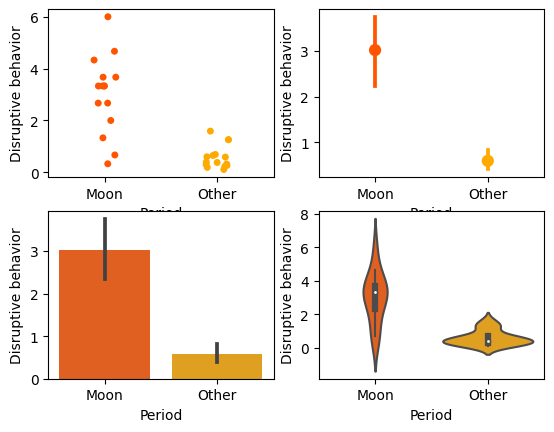

In [156]:
fig, axes = plt.subplots(2, 2)

# basic
sns.stripplot(data = moon_df, x = 'Period', y = 'Disruptive behavior', ax = axes[0,0], palette= "autumn")
# plt.show()

# line plot
sns.pointplot(data = moon_df, x = 'Period', y = 'Disruptive behavior', ax = axes[0,1], palette= "autumn")
# plt.show()

# bar plot
sns.barplot(data = moon_df, x = 'Period', y = 'Disruptive behavior', ax = axes[1,0], palette= "autumn")
# plt.show()

# violin plot
sns.violinplot(data = moon_df, x = 'Period', y = 'Disruptive behavior', ax = axes[1,1], palette= "autumn")
plt.show()



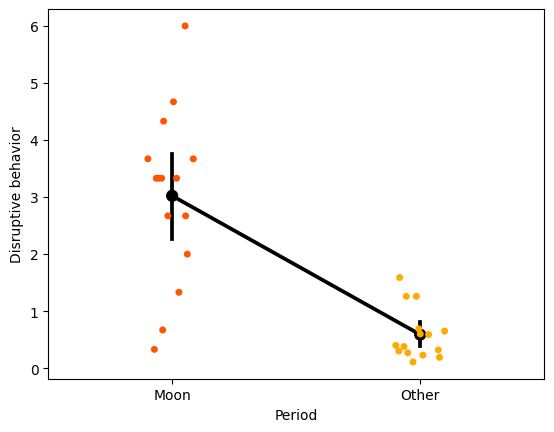

In [157]:
fig, axes = plt.subplots(1)
# scatterplot with lines
sns.stripplot(data = moon_df, x = 'Period', y = 'Disruptive behavior', ax = axes, palette= "autumn")
sns.pointplot(data = moon_df, x = 'Period', y = 'Disruptive behavior', ax = axes, color = "black")

plt.show()

## the second dataset

In [211]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Eye%20Movements.csv')

df.head(10)

# what's going on?
#df.shape

,ParticipantNumber,Condition,CriticalRecall
0,1,Horizontal,4
1,3,Fixation,14
2,4,Horizontal,12
3,6,Fixation,4
4,7,Horizontal,11
5,9,Fixation,23
6,10,Horizontal,16
7,12,Fixation,22
8,13,Horizontal,9
9,15,Fixation,16


participants were instructed to either do horizontal, vertical eye movements or fixation before reading a list of neutral words.
what we have here is the data for the horizontal and fixation condition. 
critical recall describes the nr of recalled words.

so each row is a participant, they are only in 1 condition, and we have some recall measure: **what is group1 and group2?**

In [213]:
# group1 and group2
# we google the loc docu bc i don't remember

# we only want the critical recall bc that was how it was with the dementia ppl
group1 = df.loc[df['Condition'] == 'Horizontal']
group2 = df.loc[df['Condition'] == 'Fixation']
group2.head()

,ParticipantNumber,Condition,CriticalRecall
1,3,Fixation,14
3,6,Fixation,4
5,9,Fixation,23
7,12,Fixation,22
9,15,Fixation,16


we want to test whether horizontal eye movements have a positive impact on recall 

In [139]:
# pingouin
test1 = pg.ttest(group1['CriticalRecall'], group2['CriticalRecall'], 
                alternative = 'greater')
test1

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.823413,40.268769,greater,0.996324,"[-7.04, inf]",0.813105,0.077,0.000004


In [135]:
# scipy
test2 = stats.ttest_ind(group1['CriticalRecall'], group2['CriticalRecall'], 
                  equal_var = False, alternative = 'greater')

test2

Ttest_indResult(statistic=-2.8234133654901394, pvalue=0.9963242482081401)

In [143]:
# reporting
m1 = np.mean(group1['CriticalRecall']).round(3)
m2 = np.mean(group2['CriticalRecall']).round(3)

dof = df.shape[0] - 2 # (or df.shape[0] - 1)
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Critical recall in the Horizontal condition was not significantly higher (mean = {m1}) than in the Fixation condition (mean = {m2}) (t({dof}) = {t}, p = {p})")

Critical recall in the Horizontal condition was not significantly higher (mean = 10.88) than in the Fixation conditiong (mean = 15.292) (t(47) = -2.823, p = 0.996)


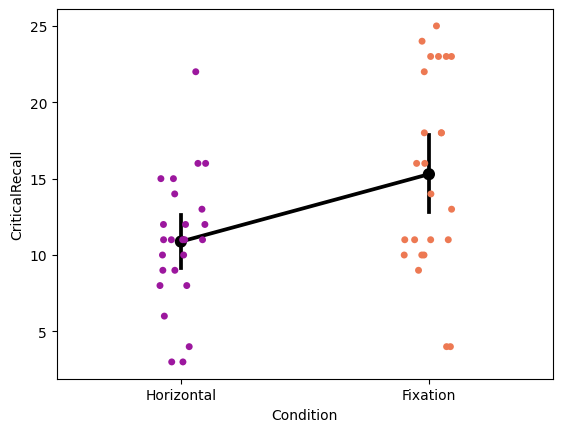

In [161]:
fig, axes = plt.subplots(1)
# scatterplot with lines
sns.stripplot(data = df, x = 'Condition', y = 'CriticalRecall', ax = axes, palette= "plasma")
sns.pointplot(data = df, x = 'Condition', y = 'CriticalRecall', ax = axes, color = "black")

plt.show()

### third dataset 
the strength and extension of two types of jeans:

- treated with lasers 
- hand-treated 

something about how to make faded areas on jeans. what matters is that they are treated differently. <br>
method: 1 = manual, 2 = laser <br>
jeanid <br>
sampleid <br>
strength <br>
extension <br>

In [215]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/university_of_florida/bluejeans_laser.csv')
df.head(5) # 50

,method,jeanid,sampleid,strength,extension
0,1,1,1,1266,68.06
1,1,2,1,1099,61.54
2,1,3,1,1068,40.48
3,1,4,1,1266,59.83
4,1,5,1,968,55.89


In [216]:
# creating groups

group1 = df.loc[df['method'] == 1] # manual
group2 = df.loc[df['method'] == 2] # laser

# group1

we want to know whether strength and extension differs between laser treated jeans and manually treated jeans

Tensile strength in the Laser condition was significantly higher (mean = 1273.283) than in the Manual conditiong (mean = 1067.433) (t(118) = -12.803, p = 0.0)


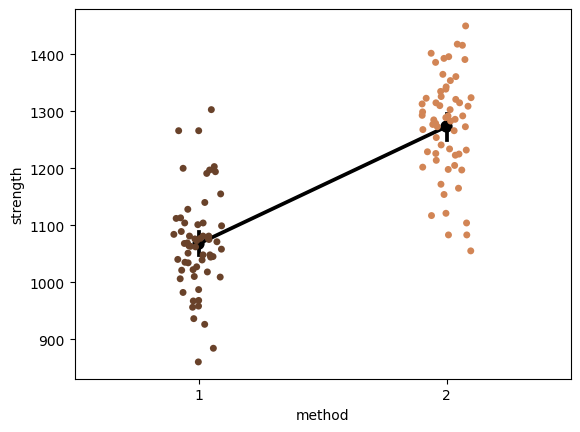

In [217]:
# strength

# pingouin
test1 = pg.ttest(group1['strength'], group2['strength'])
test1

# scipy
test2 = stats.ttest_ind(group1['strength'], group2['strength'],
               equal_var = False)
test2

# reporting
m1 = np.mean(group1['strength']).round(3)
m2 = np.mean(group2['strength']).round(3)

dof = df.shape[0] - 2 # (or df.shape[0] - 1)
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Tensile strength in the Laser condition was significantly higher (mean = {m2}) than in the Manual conditiong (mean = {m1}) (t({dof}) = {t}, p = {p})")

# plotting 
fig, axes = plt.subplots(1)
# scatterplot with lines
sns.stripplot(data = df, x = 'method', y = 'strength', ax = axes, palette= "copper")
sns.pointplot(data = df, x = 'method', y = 'strength', ax = axes, color = "black")

plt.show()

Extension in the Laser condition was significantly higher (mean = 71.343) than in the Manual conditiong (mean = 65.06) (t(118) = -4.264, p = 0.0)


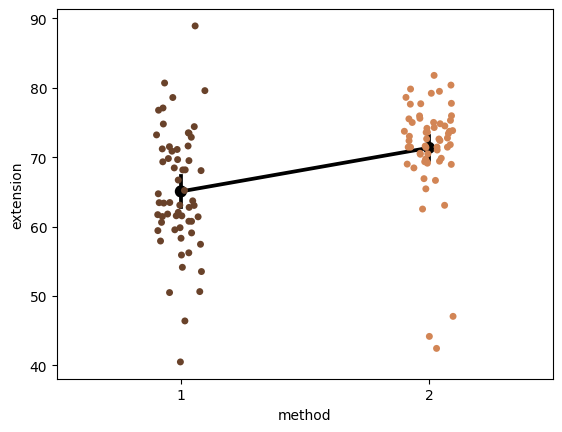

In [218]:
# extension
# pingouin
test1 = pg.ttest(group1['extension'], group2['extension'])
test1

# scipy
test2 = stats.ttest_ind(group1['extension'], group2['extension'],
               equal_var = False)
test2

# reporting
m1 = np.mean(group1['extension']).round(3)
m2 = np.mean(group2['extension']).round(3)

dof = df.shape[0] - 2 # (or df.shape[0] - 1)
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Extension in the Laser condition was significantly higher (mean = {m2}) than in the Manual conditiong (mean = {m1}) (t({dof}) = {t}, p = {p})")

# plotting 
fig, axes = plt.subplots(1)
# scatterplot with lines
sns.stripplot(data = df, x = 'method', y = 'extension', ax = axes, palette= "copper")
sns.pointplot(data = df, x = 'method', y = 'extension', ax = axes, color = "black")

plt.show()

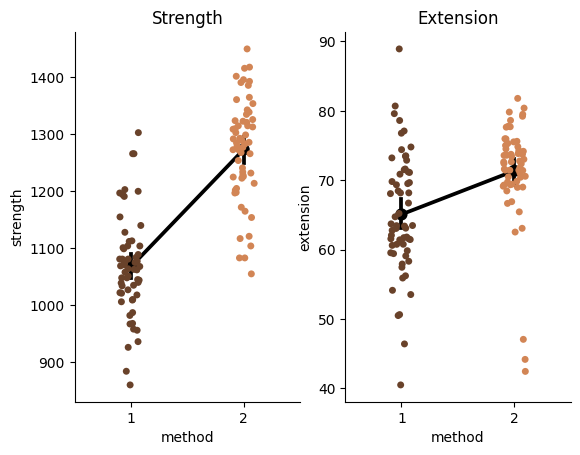

In [189]:
fig, axes = plt.subplots(1,2)
sns.stripplot(data = df, x = 'method', y = 'strength', ax = axes[0], palette= "copper")
sns.pointplot(data = df, x = 'method', y = 'strength', ax = axes[0], color = "black")

sns.stripplot(data = df, x = 'method', y = 'extension', ax = axes[1], palette= "copper")
sns.pointplot(data = df, x = 'method', y = 'extension', ax = axes[1], color = "black")
axes[0].set_title('Strength')
axes[1].set_title('Extension')
sns.despine()
plt.show()


### fourth and final dataset
crime in the U.S <br>
we want to see whether crime rates differ between northern and southern states

In [190]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/sheffield_MASH/crime.csv')

df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [193]:
# creating groups using southern columns

group1 = df.loc[df['Southern'] == 0] #northern
group2 = df.loc[df['Southern'] == 1] # southern

In [196]:
# pingouin
test1 = pg.ttest(group1['CrimeRate'], group2['CrimeRate'])
test1


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.400549,40.428033,two-sided,0.690861,"[-13.04, 19.49]",0.110563,0.322,0.064276


In [195]:
# scipy
test2 = stats.ttest_ind(group1['CrimeRate'], group2['CrimeRate'],
               equal_var = False)
test2

Ttest_indResult(statistic=0.4005489620244038, pvalue=0.6908611786450152)

In [199]:
# reporting
m1 = np.mean(group1['CrimeRate']).round(3)
m2 = np.mean(group2['CrimeRate']).round(3)

dof = df.shape[0] - 2 # (or df.shape[0] - 1)
t = test2[0].round(3)
p = test2[1].round(3)

print(f"Crime rates in the Southern states are not significantly different (mean = {m2}) than in the Northern states (mean = {m1}) (t({dof}) = {t}, p = {p})")



Crime rates in the Southern states are not significantly different (mean = 100.681) than in the Northern states (mean = 103.906) (t(45) = 0.401, p = 0.691)


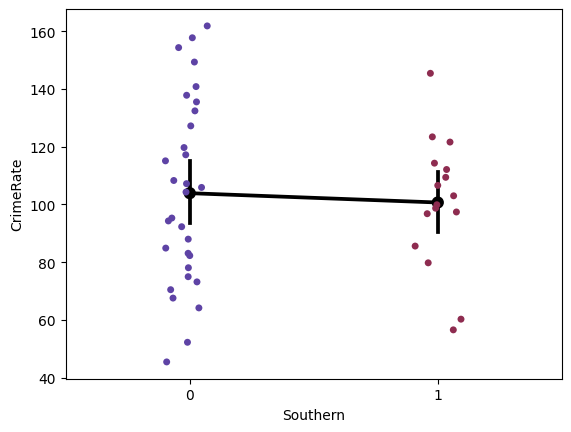

In [206]:
# plotting 
fig, axes = plt.subplots(1)
# scatterplot with lines
sns.stripplot(data = df, x = 'Southern', y = 'CrimeRate', ax = axes, palette= "twilight")
sns.pointplot(data = df, x = 'Southern', y = 'CrimeRate', ax = axes, color = "black")

plt.show()